<a href="https://colab.research.google.com/github/Chiamakac/TRAININGS/blob/main/IgboNER-Models%20/Confusion%20matrix/Copy_of_confusion_matrix_of_DistilBERT_corrected.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install the Transformers and Datasets libraries to run this notebook.**

In [ ]:
!pip install transformers
!pip install datasets

import transformers
from datasets import load_dataset

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
#We use the load_dataset() method from the Datasets library to download our dataset.
raw_datasets = load_dataset('masakhaner', 'ibo')#replace with your dataset name

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/14.1k [00:00<?, ?B/s]

masakhaner.py:   0%|          | 0.00/7.60k [00:00<?, ?B/s]

The repository for masakhaner contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/masakhaner.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] Y


Generating train split:   0%|          | 0/2235 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/320 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/638 [00:00<?, ? examples/s]

In [ ]:
#We mount the gdrive where our model checkpoint is saved.
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Describe the model path
# Replace this with your own model path
MODEL_PATH = "/content/gdrive/MyDrive/IBO_BETA/ LREC FINAL TRAINING/DistBert"

In [ ]:
#Using the fine-tuned model
from transformers import pipeline

# Replace this with your own checkpoint
model_checkpoint = "/content/gdrive/MyDrive/IBO_BETA/ LREC FINAL TRAINING/DistBert"
token_classifier = pipeline(
    "token-classification", model=model_checkpoint, aggregation_strategy="simple"
)

In [ ]:
def get_actual_tags(word, tag):
  if ' ' in word:
    words = word.split()
    return [(words[0], f"B-{tag}")]+[(w,  f"I-{tag}") for w in words[1:]]
  else:
    return [(word, f"B-{tag}")]

In [ ]:
#Have a look at the features attribute of our dataset
ner_feature = raw_datasets["train"].features["ner_tags"]
ner_feature

Sequence(feature=ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-DATE', 'I-DATE'], id=None), length=-1, id=None)

In [ ]:
#we can access the list of names by looking at the names attribute of that feature
label_names = ner_feature.feature.names
label_names

['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-DATE', 'I-DATE']

In [ ]:
#Preparing our actual and predicted tags
actual_tags, predicted_tags = [], []
for i in range(len(raw_datasets['test'])):
  actual_tags.extend(raw_datasets['test'][i]['ner_tags']) # actual_tags += raw_datasets['test'][i]['ner_tags']
  sent = ' '.join(raw_datasets['test'][i]['tokens'])
  preds = [(i['word'].strip(),i['entity_group']) for i in token_classifier(sent)]
  results=[]
  for r in preds: results.extend(get_actual_tags(r[0], r[1]))
  results_dict = {w:t for w,t in results}  #not sure this is a good idea...
  predicted_tags.extend([label_names.index(results_dict[w]) if w in results_dict else label_names.index("O") for w in sent.split()])

**We can create the confusion matrix using the confusion_matrix() method from sklearn.metrics package.**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
confusion_matrix(actual_tags,predicted_tags)

array([[10766,     1,    11,     0,     2,     5,    10,     4,    22],
       [  345,     0,     0,     0,     0,     0,     0,     0,     0],
       [  218,     0,     8,     0,     0,     0,     0,     0,     0],
       [  349,     0,     0,     2,     0,     0,     0,     0,     0],
       [  114,     1,     0,     1,     9,     0,     0,     0,     1],
       [  338,     0,     0,     0,     0,     0,     0,     0,     0],
       [   57,     0,     0,     0,     0,     0,    42,     0,     0],
       [  112,     0,     0,     0,     0,     0,     0,    31,     2],
       [  101,     0,     0,     0,     0,     0,     1,     2,    90]])

**Plotting a confusion matrix with matplotlib and seaborn**

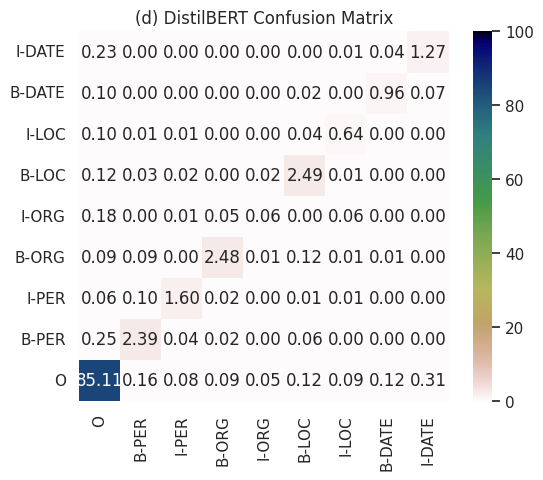

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl

# Use Seaborn styles properly
sns.set(style="whitegrid")

conf_arr = np.array([[10694,20,10,11,6,15,11,15,39],
                     [31,300,5,2,0,7,0,0,0],
                     [8,13,201,2,0,1,1,0,0],
                     [11,11,0,311,1,15,1,1,0],
                     [23,0,1,6,8,0,8,0,0],
                     [15,4,2,0,3,313,1,0,0],
                     [12,1,1,0,0,5,80,0,0],
                     [13,0,0,0,0,2,0,121,9],
                     [29,0,0,0,0,0,1,5,159]])

sum = conf_arr.sum()

conf_arr = conf_arr * 100.0 / (1.0 * sum)

df_cm = pd.DataFrame(conf_arr,
  index=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-DATE', 'I-DATE'],
  columns=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-DATE', 'I-DATE'])

fig = plt.figure()
plt.clf()

ax = fig.add_subplot(111)
ax.set_aspect(1)

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

res = sns.heatmap(df_cm, annot=True, vmin=0.0, vmax=100.0, fmt='.2f', cmap='gist_earth_r')

res.invert_yaxis()

plt.yticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5],
           ['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-DATE', 'I-DATE'], va='center')

plt.title('(d) DistilBERT Confusion Matrix')

plt.savefig('confusion_matrix.png', dpi=100, bbox_inches='tight')

plt.show()
